## Initialize Weights & Biases (wandb) for experiment tracking
## Import necessary libraries for data handling, visualization, modeling, and evaluation

In [5]:
import wandb
from wandb.integration.keras import WandbCallback

wandb.init(project="wildfire-detection", name="cnn-run-1")


wandb.init(project="wildfire-detection", name="cnn-run-1")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

## Load preprocessed training, validation, and test datasets


In [6]:
# Load data
X_train = np.load('./data/X_train.npy')
Y_train = np.load('./data/Y_train.npy')
X_valid = np.load('./data/X_valid.npy')
Y_valid = np.load('./data/Y_valid.npy')
X_test = np.load('./data/X_test.npy')
Y_test = np.load('./data/Y_test.npy')

## Define the Convolutional Neural Network (CNN) architecture


In [8]:
# Define model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  
])

## Compile the CNN model, set up early stopping, and train the model


In [9]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss',
                           patience=2,
                           restore_best_weights=True)

# Train model
history = model.fit(X_train, Y_train,
                    validation_data=(X_valid, Y_valid),
                    epochs=6,
                    batch_size=32,
                    callbacks=[early_stop])

Epoch 1/6
946/946 ━━━━━━━━━━━━━━━━━━━━ 1272s 1s/step - accuracy: 0.8946 - loss: 0.2614 - val_accuracy: 0.9343 - val_loss: 0.1741
Epoch 2/6
946/946 ━━━━━━━━━━━━━━━━━━━━ 358s 379ms/step - accuracy: 0.9378 - loss: 0.1656 - val_accuracy: 0.9594 - val_loss: 0.1134
Epoch 3/6
946/946 ━━━━━━━━━━━━━━━━━━━━ 1467s 2s/step - accuracy: 0.9483 - loss: 0.1387 - val_accuracy: 0.9595 - val_loss: 0.1184
Epoch 4/6
946/946 ━━━━━━━━━━━━━━━━━━━━ 357s 377ms/step - accuracy: 0.9511 - loss: 0.1328 - val_accuracy: 0.9667 - val_loss: 0.1019
Epoch 5/6
946/946 ━━━━━━━━━━━━━━━━━━━━ 599s 634ms/step - accuracy: 0.9607 - loss: 0.1081 - val_accuracy: 0.9589 - val_loss: 0.1073
Epoch 6/6
946/946 ━━━━━━━━━━━━━━━━━━━━ 409s 432ms/step - accuracy: 0.9641 - loss: 0.1014 - val_accuracy: 0.9570 - val_loss: 0.1066


## Evaluate the model on the test set, show metrics, plot confusion matrix, and save the model


197/197 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.9709 - loss: 0.0751
Test Accuracy: 0.97
197/197 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.9591    0.9738    0.9664      2820
           1     0.9785    0.9664    0.9724      3480

    accuracy                         0.9697      6300
   macro avg     0.9688    0.9701    0.9694      6300
weighted avg     0.9698    0.9697    0.9697      6300



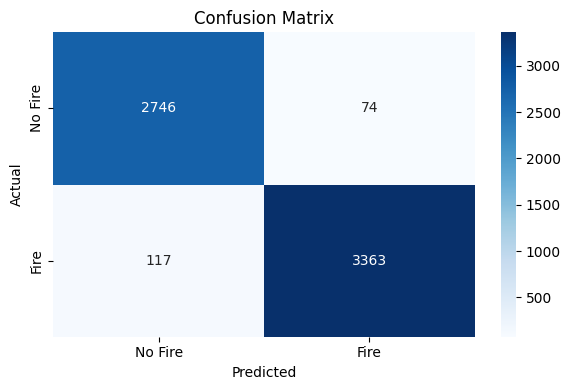

Model saved to ./wildfire_cnn_model.h5


In [10]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Metrics
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Fire", "Fire"], yticklabels=["No Fire", "Fire"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

model.save('./wildfire_cnn_model.h5')
print("Model saved to ./wildfire_cnn_model.h5")

wandb.finish()

In [11]:
! pip freeze > requirements.txt